# Анализ тарифных планов



### Описание проекта

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  - минута разговора: 3 рубля
  - сообщение: 3 рубля
  - 1 Гб интернет-трафика: 200 рублей
**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  - минута разговора: 1 рубль
  - сообщение: 1 рубль
  - 1 Гб интернет-трафика: 150 рублей

***Примечание:***

*«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.*

*Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

### Ход исследования

#### Шаг 1. Изучение общей информации

Путь к файлам:
- /datasets/calls.csv. 
- /datasets/internet.csv.
- /datasets/messages.csv.
- /datasets/tariffs.csv.
- /datasets/users.csv.

#### Шаг 2. Подготовка данных

- Привести данные к нужным типам;
- Найти и исправить ошибки в данных, если они есть.

Пояснить, какие ошибки найдены и как исправлены. В данных могут быть найдёны звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

#### Шаг 3. Проанализировать данные

Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

#### Шаг 4. Проверить гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задать самостоятельно.

Пояснить:
- как сформулированы нулевая и альтернативная гипотезы;
- какой критерий использован для проверки гипотез и почему.

#### Шаг 5. Написать общий вывод

### Описание данных

Таблица `users` (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица `calls` (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Шаг 1. Обзор данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats as st

In [2]:
# Получаем данные из таблиц
calls_df = pd.read_csv('/datasets/calls.csv')
internet_df = pd.read_csv('/datasets/internet.csv')
messages_df = pd.read_csv('/datasets/messages.csv')
tarrifs_df = pd.read_csv('/datasets/tariffs.csv')
users_df = pd.read_csv('/datasets/users.csv')

Рассмотрим полученные датафреймы:

In [3]:
display(calls_df)
display(internet_df)
display(messages_df)
display(tarrifs_df)
display(users_df)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [4]:
# Проверяем наличие дубликатов
display(calls_df.duplicated().sum())
display(internet_df.duplicated().sum())
display(messages_df.duplicated().sum())
display(tarrifs_df.duplicated().sum())
display(users_df.duplicated().sum())

0

0

0

0

0

In [5]:
# Изучаем общую информацию
calls_df.info()
print('-' * 70)
internet_df.info()
print('-' * 70)
messages_df.info()
print('-' * 70)
tarrifs_df.info()
print('-' * 70)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
-------------------------------

По результатам обзора данных выделим следующие проблемы и пути их решения:
1. Различное наименование столбцов с однородным содержимым `tariff` и `tariff_name` в разных датафреймах. Необходимо привести к единому наименованию;
2. Одинаковое наименование столбцов `id` в датафреймах `calls_df`, `internet_df`, `messages_df`. Необходимо различное наименованием, так как это разные id;
3. В таблице `internet_df` безымянный столбец с индексам, следует удалить;
4. Формат данных в столбцах `call_date`, `session_date`, `message_date`, `reg_date`, `churn_date` перевести в datetime;
5. Округлим значения продолжительности звонков до минут вверх, а для использованных мегабайт создадим дополнительный столбец с переводом в гигабайты и округлением вверх. Перевести тип данных в int.



## Шаг 2. Подготовка данных

При обзоре данных были обнаружены несоответствия в типах данных, приведём их к правильным:

In [6]:
# Переведём даты в формат datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

In [7]:
# Проверяем 
display(calls_df['call_date'].dtype)
display(internet_df['session_date'].dtype)
display(messages_df['message_date'].dtype)
display(users_df['reg_date'].dtype)
display(users_df['churn_date'].dtype)

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

In [8]:
# Округляем минуты вверх с переводом типа 
calls_df['duration'] = np.ceil(calls_df['duration']).astype('int')

In [9]:
calls_df['duration'].head(10)

0     0
1     0
2     3
3    14
4     6
5     0
6     0
7    19
8    19
9     0
Name: duration, dtype: int64

In [10]:
# Мегабайты переведём в гигабайты и округлим вверх
#internet_df['gb_used'] = internet_df['mb_used'] / 1024
#internet_df['gb_used'] = np.ceil(internet_df['gb_used']).astype('int')

#internet_df['gb_used'].head(10)

Ранее были найдены разные написания столбцов `tariff` и `tariff_name`. `tariff_name` более точное название, переименовываем столбец в таблице `users_df`:

In [11]:
users_df = users_df.rename(columns={'tariff': 'tariff_name'})

In [12]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff_name  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В таблицах `calls_df`, `internet_df`, `messages_df` переименуем столбцы `id` в уникальные.

In [13]:
calls_df = calls_df.rename(columns={'id': 'calls_id'})
internet_df = internet_df.rename(columns={'id': 'internet_id'})
messages_df = messages_df.rename(columns={'id': 'messages_id'})

In [14]:
# Проверяем изменения
display(calls_df.info())
display(internet_df.info())
display(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   calls_id   202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   internet_id   149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   messages_id   123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

В таблице `internet_df` существует столбец `Unnamed: 0` с порядковыми номерами. Так как столбец дублирует индексы, удалим его.

In [15]:
internet_df = internet_df.drop('Unnamed: 0', 1)

In [16]:
internet_df

,internet_id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Для анализа данных по месяцам создадим в таблицах `calls_df`, `internet_df`, `messages_df` столбец с названиями месяцев.

In [17]:
# По аналогии с id хочется назвать столбцы calls_month, internet_month и message_month, но так как в полном адресе уже есть название датафрейма, это нецелесообразно. В случае с id кажется, что без уточнения 
calls_df['month'] = calls_df['call_date'].dt.month
internet_df['month'] = internet_df['session_date'].dt.month
messages_df['month'] = messages_df['message_date'].dt.month
calls_df.head(10)

,calls_id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


Рассмотрим распределения значений в продолжительности звонков и расходе трафика для выявления ошибок:

In [18]:
calls_df['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

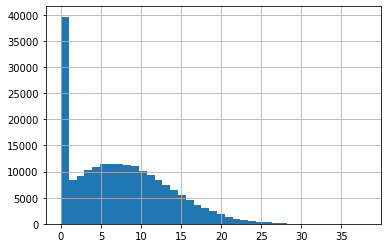

In [19]:
calls_df['duration'].hist(bins=(calls_df['duration'].max()+1));

In [20]:
internet_df['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

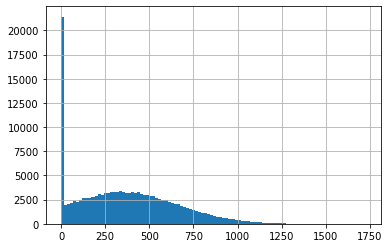

In [21]:
internet_df['mb_used'].hist(bins=100);

Распределения близки к нормальным. Имеется большое количество нулевых значений, но они связаны с тем, что многие клиенты не пользовались данным типом услуг.

Создадим сводные таблицы по пользователям по месяцам. Так как нам предоставлены данные за год, удобно будет расположить месяцы как столбцы, а пользователей по строкам.

In [22]:
# Количество израсходованных минут разговора
calls_pivot_duration = pd.pivot_table(calls_df, 
                             values='duration', 
                             index='user_id',
                             columns='month',
                             aggfunc='sum'
                             )

calls_pivot_duration.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
1005,95.0,456.0,606.0,712.0,595.0,612.0,569.0,619.0,479.0,723.0,547.0,592.0
1006,NaN,42.0,286.0,356.0,370.0,478.0,316.0,275.0,360.0,267.0,372.0,379.0
1007,NaN,NaN,NaN,198.0,480.0,545.0,577.0,458.0,655.0,465.0,580.0,421.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.0


In [23]:
# Количество звонков
calls_pivot_count = pd.pivot_table(calls_df, 
                             values='duration', 
                             index='user_id',
                             columns='month',
                             aggfunc='count'
                             )
calls_pivot_count.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


In [24]:
# Количество сообщений
messages_pivot_count = pd.pivot_table(messages_df,
                                      values='messages_id',
                             index='user_id',
                             columns='month',
                             aggfunc='count'
                             )
messages_pivot_count.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


In [25]:
# Объём трафика в мегабайтах
internet_pivot_mb = pd.pivot_table(internet_df,
                                      values='mb_used',
                             index='user_id',
                             columns='month',
                             aggfunc='sum'
                             )
internet_pivot_mb.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


In [26]:
# Объём трафика в гигабайтах
internet_pivot_gb = pd.pivot_table(internet_df,
                                      values='mb_used',
                             index='user_id',
                             columns='month',
                             aggfunc='sum'
                             )
internet_pivot_gb.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


Для вычисления помесячной выручки каждого пользователя удобнее будет предварительно расположить месяцы по строкам, создав многоуровневую сводную таблицу.

In [27]:
# Продолжительность звонков
calls_durations = pd.pivot_table(calls_df,
                                 values='duration',
                                 index=['user_id', 'month'],
                                 aggfunc='sum').reset_index() # reset_index превратил красивую многоуровневую сводную таблицу в обычную таблицу. Без него убирается столбец с месяцами при ".merge(users_df..."

calls_durations

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


In [28]:
# Количество смс
messages_count = pd.pivot_table(messages_df,
                                values='messages_id',
                                index=['user_id', 'month'],
                                aggfunc='count').reset_index()

messages_count

,user_id,month,messages_id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [29]:
# Использованный трафик
traffic_count = pd.pivot_table(internet_df,
                                values='mb_used',
                                index=['user_id', 'month'],
                                aggfunc='sum').reset_index()

traffic_count['gb_used'] = traffic_count['mb_used'] / 1024
traffic_count['gb_used'] = np.ceil(traffic_count['gb_used']).astype('int')

traffic_count

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


Объединим полученные значения в одну таблицу по месяцам для каждого пользователя, утончнив тариф.

In [30]:
total_df = calls_durations.merge(messages_count, on=['user_id', 'month'], how='outer')
total_df = total_df.merge(traffic_count, on=['user_id', 'month'], how='outer')
total_df = total_df.merge(users_df, on='user_id', how='left')
total_df = total_df.merge(tarrifs_df, on='tariff_name', how='left')
# Из-за пустых значений в смс и звонках у некоторых пользователей  сбилась сортировка по id и месяцам, исправляем
total_df = total_df.sort_values(by=['user_id', 'month'])

total_df

,user_id,month,duration,messages_id,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2253.49,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23233.77,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14003.64,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14055.93,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14568.91,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,247.0,42.0,20579.36,21.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3170,1499,9,70.0,11.0,1845.75,2.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3171,1499,10,449.0,48.0,17788.51,18.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3172,1499,11,612.0,59.0,17963.31,18.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


In [31]:
# Очистим таблицу от ненужных для расчёта столбцов. Ненужных меньше, чем нужных, поэтому удаление будет короче. 'city' оставляем для проверки гипотезы
total_df_cleared = total_df.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], 1)
total_df_cleared

,user_id,month,duration,messages_id,mb_used,gb_used,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2253.49,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23233.77,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14003.64,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14055.93,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14568.91,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,247.0,42.0,20579.36,21.0,Владикавказ,smart,50,15360,500,550,200,3,3
3170,1499,9,70.0,11.0,1845.75,2.0,Пермь,smart,50,15360,500,550,200,3,3
3171,1499,10,449.0,48.0,17788.51,18.0,Пермь,smart,50,15360,500,550,200,3,3
3172,1499,11,612.0,59.0,17963.31,18.0,Пермь,smart,50,15360,500,550,200,3,3


В процессе объединения таблиц в некоторых столбцах появились пустые значения, если пользователь не использует звонки, смс и интернет в одном месяце. Заполним пропуски нулями.

In [32]:
total_df_cleared['duration'] = total_df_cleared['duration'].fillna(0)
total_df_cleared['mb_used'] = total_df_cleared['mb_used'].fillna(0)
total_df_cleared['gb_used'] = total_df_cleared['gb_used'].fillna(0)
total_df_cleared['messages_id'] = total_df_cleared['messages_id'].fillna(0)
total_df_cleared.isna().sum()

user_id                  0
month                    0
duration                 0
messages_id              0
mb_used                  0
gb_used                  0
city                     0
tariff_name              0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Так как в датафрейме уже есть столбцы с лимитами и стоимостями, остаётся написать функцию, которая пересчитает затраты сверх лимита.

In [33]:
def over_payment(row):
  total = 0
  if row['minutes_included'] < row['duration']:
    total += (row['duration'] - row['minutes_included']) * row['rub_per_minute']
  if row['messages_included'] < row['messages_id']:
    total += (row['messages_id'] - row['messages_included']) * row['rub_per_message']
  if row['mb_per_month_included'] / 1024 < row['gb_used']:
    total += (row['gb_used'] - row['mb_per_month_included'] / 1024) * row['rub_per_gb']
  return total

In [34]:
# Создаём столбец со сверхлимитными затратами
total_df_cleared['over_payment'] = total_df_cleared.apply(over_payment, 1)

# Создаём столбец с итоговыми затратами
total_df_cleared['total_amount'] = total_df_cleared['rub_monthly_fee'] + total_df_cleared['over_payment']
total_df_cleared.sample(20)

,user_id,month,duration,messages_id,mb_used,gb_used,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_payment,total_amount
1270,1201,9,1045.0,0.0,12196.55,12.0,Москва,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
349,1055,9,465.0,31.0,18811.52,19.0,Казань,smart,50,15360,500,550,200,3,3,800.0,1350.0
523,1083,7,414.0,47.0,17199.33,17.0,Сочи,smart,50,15360,500,550,200,3,3,400.0,950.0
53,1007,4,198.0,11.0,8022.76,8.0,Москва,smart,50,15360,500,550,200,3,3,0.0,550.0
1644,1264,6,464.0,17.0,13740.04,14.0,Хабаровск,smart,50,15360,500,550,200,3,3,0.0,550.0
1849,1294,12,261.0,23.0,27306.37,27.0,Владивосток,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2249,1360,8,771.0,0.0,8633.31,9.0,Санкт-Петербург,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2409,1382,6,681.0,74.0,7844.43,8.0,Самара,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1655,1265,10,130.0,6.0,2241.43,3.0,Омск,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1427,1226,11,122.0,83.0,11368.77,12.0,Новосибирск,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


**Вывод:**

В результате подготовки данных создана сводная таблица с помесячной информацией о каждом пользователе, в том числе информацией об оплате сверх лимита и итоговой суммой.

## Шаг 3. Анализ данных

### Общее поведение клиентов

Рассмотрим поведение клиентов с разных сторон.

In [35]:
total_df_cleared['tariff_name'].value_counts()

smart    2229
ultra     985
Name: tariff_name, dtype: int64

Тарифом "Смарт" люди пользуются чаще.

Посмотрим на средние и медианные значения:

In [36]:
means_by_tariff = total_df_cleared.groupby('tariff_name').agg({'duration': 'mean', 'messages_id': 'mean', 'gb_used': 'mean'})
means_by_tariff

,duration,messages_id,gb_used
tariff_name,,,
smart,417.934948,33.384029,16.328847
ultra,526.623350,49.363452,19.494416


In [37]:
median_by_tariff = total_df_cleared.groupby('tariff_name').agg({'duration': 'median', 'messages_id': 'median', 'gb_used': 'median'})
median_by_tariff

,duration,messages_id,gb_used
tariff_name,,,
smart,422.0,28.0,17.0
ultra,518.0,38.0,19.0


Тариф "Ультра" включает в себя гораздо больше звонков, сообщений и интернета, но фактические отличия между тарифами не настолько велики. Проверим, действительно ли "скупой платит дважды". Выберем пользователей с тарифом "Смарт" и посчитаем, сколько они заплатили бы при подключении тарифа "Ультра".

In [38]:
smart_df = total_df_cleared.query('tariff_name == "smart"').reset_index()
smart_sum = smart_df['total_amount'].sum()
smart_sum

2875351.0

In [39]:
# Изменим тарифы на "Ультра" и применим функцию расчёта стоимости
smart_df['tariff_name'] = 'ultra'
smart_df['rub_monthly_fee'] = 1950
smart_df['messages_included'] = 1000
smart_df['minutes_included'] = 3000
smart_df['mb_per_month_included'] = 30720
smart_df['rub_per_message'] = 1
smart_df['rub_per_minute'] = 1
smart_df['rub_per_gb'] = 150

smart_df['over_payment'] = smart_df.apply(over_payment, 1)

smart_df['total_amount'] = smart_df['rub_monthly_fee'] + smart_df['over_payment']
smart_df.head(10)

,index,user_id,month,duration,messages_id,mb_used,gb_used,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_payment,total_amount
0,8,1001,11,430.0,0.0,18429.34,18.0,Москва,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,9,1001,12,414.0,0.0,14036.66,14.0,Москва,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,10,1002,6,117.0,4.0,10856.82,11.0,Стерлитамак,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,11,1002,7,214.0,11.0,17580.10,18.0,Стерлитамак,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,12,1002,8,289.0,13.0,20319.26,20.0,Стерлитамак,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
5,13,1002,9,206.0,4.0,16691.08,17.0,Стерлитамак,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
6,14,1002,10,212.0,10.0,13888.25,14.0,Стерлитамак,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
7,15,1002,11,243.0,16.0,18587.28,19.0,Стерлитамак,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
8,16,1002,12,236.0,12.0,18113.73,18.0,Стерлитамак,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
9,30,1005,1,95.0,7.0,2727.97,3.0,Набережные Челны,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


In [40]:
really_smart_sum = smart_df['total_amount'].sum()
print(f'Всего пользователи тарифа "Смарт" переплатили {smart_sum - really_smart_sum} рублей. Более дешёвый тариф оказался на {(100/really_smart_sum*smart_sum-100).round(1)}% дороже.')


Всего пользователи тарифа "Смарт" переплатили -1480049.0 рублей. Более дешёвый тариф оказался на -34.0% дороже.


Проверим обратное: переплатили ли пользователи тарифа "Ультра" за свой ошибочный выбор?

In [41]:
ultra_df = total_df_cleared.query('tariff_name == "ultra"').reset_index()
ultra_sum = ultra_df['total_amount'].sum()
ultra_sum

2039100.0

In [42]:
# Изменим тарифы на "Смарт" и применим функцию расчёта стоимости
ultra_df['tariff_name'] = 'smart'
ultra_df['rub_monthly_fee'] = 550
ultra_df['messages_included'] = 50
ultra_df['minutes_included'] = 500
ultra_df['mb_per_month_included'] = 15360
ultra_df['rub_per_message'] = 3
ultra_df['rub_per_minute'] = 3
ultra_df['rub_per_gb'] = 200
ultra_df['over_payment'] = ultra_df.apply(over_payment, 1)

ultra_df['total_amount'] = ultra_df['rub_monthly_fee'] + ultra_df['over_payment']
ultra_df.head(10)

,index,user_id,month,duration,messages_id,mb_used,gb_used,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_payment,total_amount
0,0,1000,5,159.0,22.0,2253.49,3.0,Краснодар,smart,50,15360,500,550,200,3,3,0.0,550.0
1,1,1000,6,172.0,60.0,23233.77,23.0,Краснодар,smart,50,15360,500,550,200,3,3,1630.0,2180.0
2,2,1000,7,340.0,75.0,14003.64,14.0,Краснодар,smart,50,15360,500,550,200,3,3,75.0,625.0
3,3,1000,8,408.0,81.0,14055.93,14.0,Краснодар,smart,50,15360,500,550,200,3,3,93.0,643.0
4,4,1000,9,466.0,57.0,14568.91,15.0,Краснодар,smart,50,15360,500,550,200,3,3,21.0,571.0
5,5,1000,10,350.0,73.0,14702.49,15.0,Краснодар,smart,50,15360,500,550,200,3,3,69.0,619.0
6,6,1000,11,338.0,58.0,14756.47,15.0,Краснодар,smart,50,15360,500,550,200,3,3,24.0,574.0
7,7,1000,12,333.0,70.0,9817.61,10.0,Краснодар,smart,50,15360,500,550,200,3,3,60.0,610.0
8,17,1003,8,380.0,37.0,8565.21,9.0,Москва,smart,50,15360,500,550,200,3,3,0.0,550.0
9,18,1003,9,961.0,91.0,12468.87,13.0,Москва,smart,50,15360,500,550,200,3,3,1506.0,2056.0


In [43]:
smart_ultra_sum = ultra_df['total_amount'].sum()
print(f'Всего пользователи тарифа "Ультра" переплатили {ultra_sum - smart_ultra_sum} рублей. Более дорогой тариф оказался на {(100/smart_ultra_sum*ultra_sum-100).round(1)}% дороже.')

Всего пользователи тарифа "Ультра" переплатили -279668.0 рублей. Более дорогой тариф оказался на -12.1% дороже.


**Промежуточный вывод:**

Среднее количество использованных минут, сообщений и трафика незначительно различается между тарифами. Если количество сообщений и минут низкое и часто не превышает лимит, то средний объём трафика выше, чем включено в тарифный пакет.
В среднем, пользователи не переплачивают по причине выбора невыгодного тарифа.

### Изучение параметров данных, анализ потребностей клиентов

Рассмотрим использование услуг клиентами.

In [44]:
# Запишем один раз набор параметров, которые необходимы. Ренее наблюдали, что медианы не так интересны в выбранном датафрейме: отличие от средней незначительное, кроме количества смс в тарифе "Ультра".
agg_p = ['mean', 'var', 'std']

In [45]:
# Количество использованных минут по тарифам
total_df_cleared.groupby('tariff_name').agg({'duration': agg_p})

duration                           
                   mean            var         std
tariff_name                                       
smart        417.934948   36219.315784  190.313730
ultra        526.623350  100873.633397  317.606098

In [46]:
# Количество использованных сообщений по тарифам
total_df_cleared.groupby('tariff_name').agg({'messages_id': agg_p})

messages_id                        
                   mean          var        std
tariff_name                                    
smart         33.384029   796.812958  28.227876
ultra         49.363452  2285.266143  47.804457

In [47]:
# Количество использованного трафика по тарифам
total_df_cleared.groupby('tariff_name').agg({'gb_used': agg_p})

gb_used                     
                  mean        var       std
tariff_name                                
smart        16.328847  33.028705  5.747061
ultra        19.494416  97.091686  9.853511

Для более нагладного понимания данных построим диаграммы.

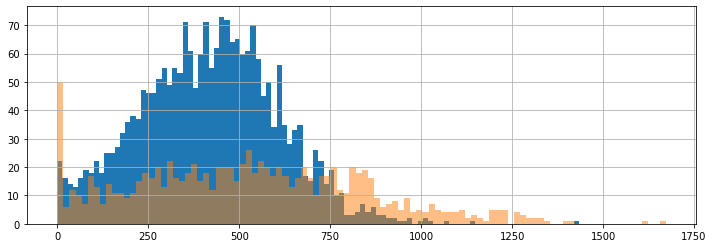

In [48]:
# Рассматриваем продолжительность звонков, затраченных на разных тарифах.
total_df_cleared.query('tariff_name == "smart"')['duration'].hist(bins=100, figsize=(12, 4));
total_df_cleared.query('tariff_name == "ultra"')['duration'].hist(bins=100, figsize=(12, 4), alpha=0.5);

На графике видно, что пользователи тарифа "Смарт" пользуются звонками, стараясь не превысить лимит - после 500 минут график направлен вниз. У пользователей тарифа "Ультра" лимит минут равен 3000, но никто не использовал все минуты. Распределение частот более плоское, можем предположить, что пользователи дорогого тарифа разговаривают столько, сколько необходимо, не следя за лимитом.

Также можем предположить, что у пользователей тарифа "Ультра" часто отсутствуют звонки. Возможно, они пользуются дорогим тарифом ради большего лимита трафика или смс, проверим:


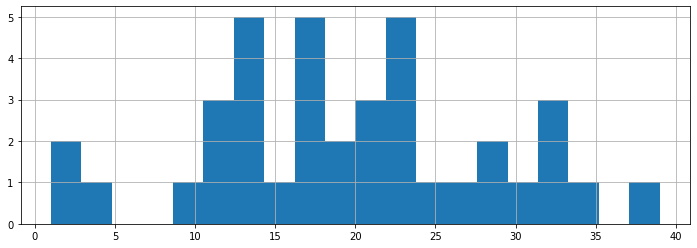

In [49]:
# Проверяем, ради чего пользователи тарифа "Ультра" используют более дорогой тариф, если не ради звонков
total_df_cleared.query('tariff_name == "ultra" & duration == 0')['gb_used'].hist(bins=20, figsize=(12, 4));

Действительно, клиенты без звонков активно используют интернет. Количество трафика и его распределение соответствует данным остальных клиентов выборки. Далее рассмотрим, пользуются ли люди без звонков сообщениями:

<AxesSubplot:>

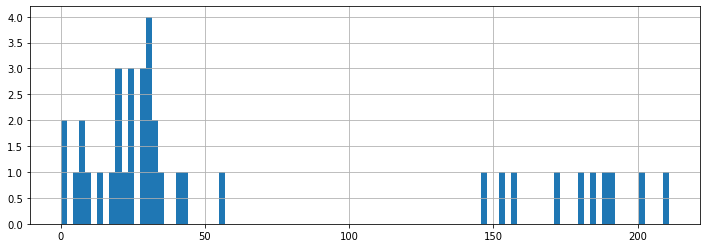

In [50]:
total_df_cleared.query('tariff_name == "ultra" & duration == 0')['messages_id'].hist(bins=100, figsize=(12, 4))

Клиенты без звонков пользуются сообщениями, причём либо примерно по 1 смс в день, либо в 3-4 раза чаще. Посмотрим на общее распределение количества сообщений:

<AxesSubplot:>

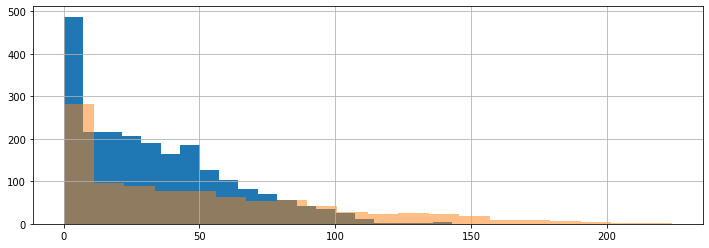

In [51]:
# Рассматриваем количество сообщений, затраченных на разных тарифах
total_df_cleared.query('tariff_name == "smart"')['messages_id'].hist(bins=20, figsize=(12, 4))
total_df_cleared.query('tariff_name == "ultra"')['messages_id'].hist(bins=20, figsize=(12, 4), alpha=0.5)

По графику видно, что многие пользователи не используют сообщения. На графике использованных гигабайт выделим этих пользователей.

<AxesSubplot:>

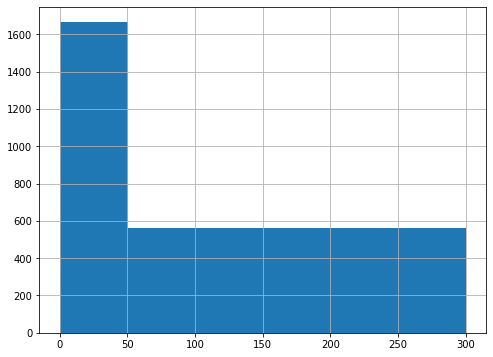

In [52]:
# Посмотрим, сколько пользователей превысили лимит по сообщениям
total_df_cleared.query('tariff_name == "smart"')['messages_id'].hist(bins=[0, 50.1, 300], figsize=(8, 6))

Менее 600 пользователей из 2229 отправили сверхлимитные сообщения.

<AxesSubplot:>

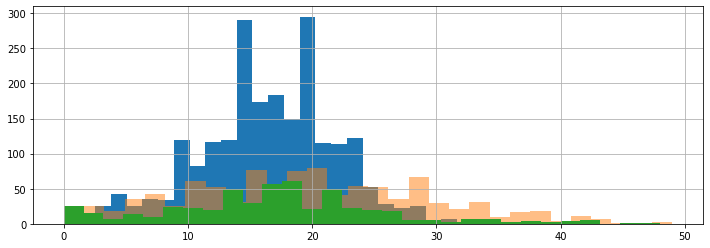

In [53]:
# Рассматриваем количество гигабайт, затраченных на разных тарифах.
total_df_cleared.query('tariff_name == "smart"')['gb_used'].hist(bins=30, figsize=(12, 4))
total_df_cleared.query('tariff_name == "ultra"')['gb_used'].hist(bins=30, figsize=(12, 4), alpha=0.5)
total_df_cleared.query('messages_id == 0 | gb_used == 0')['gb_used'].hist(bins=30, figsize=(12, 4))

Распределение пользователей тарифа "Смарт" по количеству использованных гигабайт больше похоже на нормальное с пиками на 15 и 20 Гб. Пользователи тарифа "Ультра" распределены более равномерно, хотя диапазон использованных гигабайт примерно одинаковый для всех пользователей. 

На графике минут наблюдалось падение при достижении лимита, но на графике интернет-трафика подобная зависимость отсутствует.

## Шаг 4. Проверка гипотез

### Гипотеза о равенстве средней выручки среди пользователей разных тарифов

Проверим гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам - тарифным планам.

Так как выборки независимые и имеют большое количество данных, используем  метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам `scipy.stats.ttest_ind`.

- **Нулевая гипотеза:** средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая
- **Альтернативная гипотеза:** средняя выручка пользователей тарифов "Ультра" и "Смарт" различается


In [54]:
sample_1_1 = total_df_cleared.query('tariff_name == "smart"')['total_amount']
sample_1_2 = total_df_cleared.query('tariff_name == "ultra"')['total_amount']

Так как в выборах находится достаточное количество значений, их нормальное распределение не является обязательным условием. Учитывая то, что значительная часть пользователей платят только абонентскую плату, нормальное распределение будет искажено большим пиком на уровне стоимости тарифного плана.

In [55]:
results = st.ttest_ind(sample_1_1, sample_1_2, equal_var=False) #equal_var=False, так как выборки разного размера

alpha = .01

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Имеются значительные различия между выручкой пользователей разных тарифов.

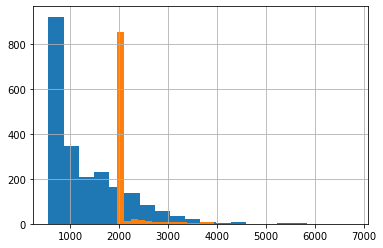

In [56]:
# Посмотрим на графике, действительно ли сильно различаются выборки
sample_1_1.hist(bins=20);
sample_1_2.hist(bins=20);

### Гипотеза о равенстве средней выручки пользователей из Москвы и из других регионов

Проверим гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам - тарифным планам. Выборки независимые, количество данных достаточное для корректного анализа.

- **Нулевая гипотеза:** средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
- **Альтернативная гипотеза:** средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов


In [57]:
sample_2_1 = total_df_cleared.query('city == "Москва"')['total_amount']
sample_2_2 = total_df_cleared.query('city != "Москва"')['total_amount']

In [58]:
results = st.ttest_ind(sample_2_1, sample_2_2, equal_var=False) #equal_var=False, так как выборки разного размера

alpha = .01

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


p-значение большое, гипотеза будет отвергнута даже при большем значении alpha.
Посмотрим на график распределения:

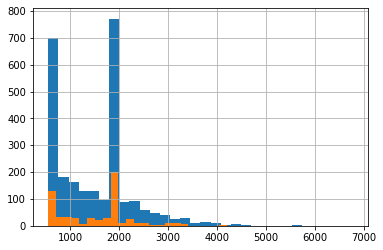

In [59]:
sample_2_2.hist(bins=30);
sample_2_1.hist(bins=30);

Графики действительно имеют очень похожее распределение и диапазон. Предполагаем, что причина их схожести в большом количестве пользователей, которые платят только абонентскую плату.

Проверим только пользователей, которые используют дополнительные лимиты: нулевая гипотеза: сверхлимитные платежи одинаковые для пользователей из Москвы и других регионов.

In [60]:
sample_2_3 = total_df_cleared.query('city == "Москва" & over_payment != 0')['total_amount']
sample_2_4 = total_df_cleared.query('city != "Москва" & over_payment != 0')['total_amount']

results = st.ttest_ind(sample_2_3, sample_2_4, equal_var=False) #equal_var=False, так как выборки разного размера

alpha = .01

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8944222305490894
Не получилось отвергнуть нулевую гипотезу


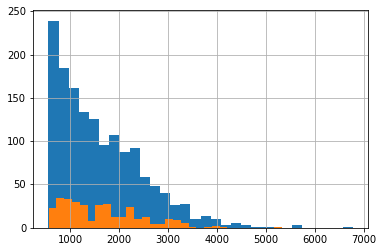

In [61]:
sample_2_4.hist(bins=30);
sample_2_3.hist(bins=30);

Даже после удаления пользоваталей, платящих абонентскую плату, средние двух выборок очень схожи.

## Вывод

Изучены данные пользователей по тарифам "Смарт" и "Ультра" компании "Мегалайн" за 2018 год. В результате анализа полученные следующие результаты:
1. Среднее количество использованных минут, сообщений и трафика незначительно различается между тарифами;
2. Пользователям требуется большее количество интернет-трафика, чем установленные лимиты. Пользователи редно следят за количеством использованного интернета;
4. - Медианный пользователь тарифа "Смарт" использует 418 минут. В целом, пользователи стремятся соблюдать лимит 500 минут;
  - Медианный пользователь тарифа "Ультра" использует 516, но в распределении отсутствует область концентрации, явные пики - лимит слишком высокий и пользователи не следят за количеством минут;
5. Сообщения не пользуются большим спросом, около четверти пользователей тарифа "Смарт" отправили сообщения сверх лимита. Многие пользователи не отправили ни одного сообщения;

Основные выводы:
1. Тариф "Ультра" приносит больше выручки, чем тариф "Смарт";
2. Выручка не отличается в Москве от выручки в регионах.